# To. 뉴진스.. 

```
‘공공도서관 프로그램'으로 검색했을 때... 

문제 1. 키워드가 들어간 트윗 자체가 많이 없음 
-> ‘지역+도서관' 으로 추가 검색해보면 더 많은 자료가 나올 것 가틈. 

문제 2. 도서관 측에서 뿌린 홍보자료가 넘 많이 나옴 
-> 좋아요가 아예 없는 트윗은 삭제하니까 ㄱㅊ았음... 다른 검색키워드로는 어떨지 모르겠네여

```

In [1]:
!pip3 install snscrape

In [4]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 트윗을 긁어와서 넣어놓을 리스트 생성
tweets_list = []

# TwitterSearchScraper를 이용하여 해당 트윗을 긁어와서 리스트에 넣기 ('검색어 since:시작날짜 until:끝나는날짜')
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('다문화 프로그램 since:2020-01-01 until:2022-08-23').get_items()):
    if i > 10000:
        break
    tweets_list.append([tweet.date, tweet.content, tweet.likeCount])
    
# 다 긁어왔다면 데이터 프레임으로 저장시키기
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'content', 'Like'])
tweets_df

,Datetime,content,Like
0,2022-08-22 11:43:40+00:00,수원시다문화가족지원센터 청소년 방학프로그램(직업잡고) 진행 https://t.co/...,0
1,2022-08-21 23:04:18+00:00,['고등학교방문 다문화체험' 참여 신청 안내] #충청북도국제교육원 #다문화교육지원센...,0
2,2022-08-21 10:30:21+00:00,울산동구건강가정·다문화가족지원센터 아프칸 특별기여자 파트너 프로그램 ‘함께하다’ 실...,0
3,2022-08-19 10:59:26+00:00,"경산시, 다문화가정 자녀와 함께 하는 취학준비 프로그램 진행 #경산 # 다문화 # ...",0
4,2022-08-19 07:44:55+00:00,"[사회]\n다문화교류네트워크, 다문화어린이 위한 서울대 견학 프로그램 \n259\...",0
...,...,...,...
673,2020-01-05 10:21:34+00:00,"특히, 다문화가족 관련 법, 한국의 기초생활 법, 외국인 인권 관련 법, 한국문화 ...",0
674,2020-01-05 10:21:32+00:00,제천시건강가정٠다문화가족지원센터는 다문화가족 관계 향상을 위한 다양한 프로그램을 운...,0
675,2020-01-03 07:32:10+00:00,도서관으로 떠나는 다문화 여행 ✈️~\n이런 기회 흔치않다구!? 👲👳‍♀️🧕\n\n...,2
676,2020-01-02 07:21:24+00:00,"제천시다문화가족지원센터, 다양한 프로그램 운영 호응 / 브레이크뉴스 https:/...",0


In [5]:
tweets_df = tweets_df.drop_duplicates(subset='content')

In [6]:
# '공공도서관 프로그램'이라는 키워드에는 도서관 홍보자료가 너무 많아서 좋아요가 아예 없는 트윗은 제거했음
tweets_df.sort_values(by = "Like", ascending=False)
tweets_df = tweets_df[tweets_df['Like']>0]

In [7]:
#여러 키워드로 검색 많이 해봐야 할 것 같아서 '검색결과+시작월일+끝나는월일+'의 형식으로 파일 저장했음
tweets_df.to_csv('다문화 프로그램 20200101_20220823.csv', encoding="utf-8-sig", index=False)

In [7]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import multiprocessing
import numpy as np
from collections import defaultdict
from tqdm import trange
import re
import numpy as np
from collections import defaultdict


data = pd.read_csv('다문화 프로그램 20200101_20220823.csv',engine='python',encoding='utf-8-sig')
del data['Like']
data

,Datetime,content
0,2022-08-19 04:49:12+00:00,"수원시다문화가족지원센터, 베트남 학습 멘토링 프로그램 베트남 요리 경연대회 및 문화..."
1,2022-08-16 12:24:22+00:00,"안산시, 외국인노동자 귀국 지원 프로그램 운영 https://t.co/NYcEGFSKED"
2,2022-08-15 08:26:27+00:00,"어떤 이는 우리가 처음 버스에 오르며 이름표를 나눠받을 때, 나를 슥 보더니 작게 ..."
3,2022-08-15 03:24:32+00:00,"""국제결혼광고나 &lt;다문화 고부열전&gt; 따위의 예능 프로그램으로는 당신에 관..."
4,2022-08-13 02:06:10+00:00,"딤양군가족센터, 다문화가족 자녀성장지원 프로그램 ‘풍성’ https://t.co/n..."
...,...,...
127,2020-01-22 21:59:28+00:00,"김천시건강가정다문화가족지원센터, 법무부사회통합프로그램 운영기관 선정\n \n김천시건..."
128,2020-01-21 05:44:28+00:00,2018년 기준 결혼이민자 상위 6개국은 모두 아시아인데...\nTV 예능프로그램 ...
129,2020-01-08 21:36:06+00:00,동대문구 다문화 가족 소통 공간 다가온 개소\n- 동대문구 다사랑행복센터에서 결혼이...
130,2020-01-07 00:54:41+00:00,"청.다.말. &lt;청소년, 다문화에 말을 걸다!&gt;. 청소년들과 자원봉사자들이..."


In [9]:
# Basic Cleaning Text Function
def Twitter_use_only(readData, Num=False, Eng=False):
    list_text = []
    
    for i in trange(len(data['content'])):
        
        pre_text = data['content'][i]
        # Retweets 제거
        text = re.sub('RT @[\w_]+: ', '', pre_text)

        # enticons 제거
        text = re.sub('@[\w_]+', '', text)

        # URL 제거
        text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
        text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    #     pattern = '(http|ftp|https)://(?:[-\w.]|(?:\da-fa-F]{2}))+'
    #     text = re.sub(pattern = pattern, repl = ' ',string=text)

        # Hashtag 제거
        text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

        # 쓰레기 단어 제거
        text = re.sub('[&]+[a-z]+', ' ', text)

        # 특수문자 제거
        text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)

        # 띄어쓰기 제거
        text = text.replace('\n',' ')

        if Num is True:
            # 숫자 제거
            text = re.sub(r'\d+',' ',text)

        if Eng is True:
            # 영어 제거 
            text = re.sub('[a-zA-Z]' , ' ', text)

        # 정리
        text = ' '.join(text.split())
        list_text.append(text)
    
#         print(list_text)

    del data['content']
    
    return list_text
# 문장 단어별 split
def WordList(data):
    f_list = []
    
    data['text'] = data['text'].astype(str)
    
    for i in trange(len(data)):
        f_list.append(data['text'][i].split())
    
    return f_list

text = Twitter_use_only(data)

text_df = pd.DataFrame(text)
data_df = pd.concat([data,text_df],axis=1)
data_df.columns = ['tweet_date', 'text']

data_df_reset = data_df.reset_index(drop=True)

100%|███████████████████████████████████████| 132/132 [00:00<00:00, 5546.91it/s]


In [10]:
data_df_reset

,tweet_date,text
0,2022-08-19 04:49:12+00:00,수원시다문화가족지원센터 베트남 학습 멘토링 프로그램 베트남 요리 경연대회 및 문화체...
1,2022-08-16 12:24:22+00:00,안산시 외국인노동자 귀국 지원 프로그램 운영
2,2022-08-15 08:26:27+00:00,어떤 이는 우리가 처음 버스에 오르며 이름표를 나눠받을 때 나를 슥 보더니 작게 불...
3,2022-08-15 03:24:32+00:00,국제결혼광고나 다문화 고부열전 따위의 예능 프로그램으로는 당신에 관한 진실이 결코 ...
4,2022-08-13 02:06:10+00:00,딤양군가족센터 다문화가족 자녀성장지원 프로그램 풍성 담양군가족센터 다문화가족 자녀성...
...,...,...
127,2020-01-22 21:59:28+00:00,김천시건강가정다문화가족지원센터 법무부사회통합프로그램 운영기관 선정 김천시건강가정 다...
128,2020-01-21 05:44:28+00:00,2018년 기준 결혼이민자 상위 6개국은 모두 아시아인데 TV 예능프로그램 속 다문...
129,2020-01-08 21:36:06+00:00,동대문구 다문화 가족 소통 공간 다가온 개소 동대문구 다사랑행복센터에서 결혼이주여성...
130,2020-01-07 00:54:41+00:00,청 다 말 청소년 다문화에 말을 걸다 청소년들과 자원봉사자들이 방글라데시에 가 현지...


In [11]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()



import sys

o_ll = []
for i in trange(len(ll_list)):
    real_text = okt.normalize(ll_list[i])
    o_ll.append(real_text)
result = ' '.join(o_ll)
#result

100%|█████████████████████████████████████████| 132/132 [00:20<00:00,  6.53it/s]


In [12]:
result

'수원시다문화가족지원센터 베트남 학습 멘토링 프로그램 베트남 요리 경연대회 및 문화체험 행사 성료 안산시 외국인노동자 귀국 지원 프로그램 운영 어떤 이는 우리가 처음 버스에 오르며 이름표를 나눠받을 때 나를 슥 보더니 작게 불쌍해 이렇게 말하는 것이었다 아니 다문화가정 청소년 을 대상으로 하는 프로그램이 있다 하여 신청한 것일 뿐인데 왜 불쌍하단 소리를 들어야 하지 정말 불쾌한 경험이었다 국제결혼광고나 다문화 고부열전 따위의 예능 프로그램으로는 당신에 관한 진실이 결코 드러나지 않는다 당신이 누구인지 이주여성이라는 정체성이 진정으로 어떤 모습인지 배운 건 한 권의 책을 통해서다 책의 제목은 다음과 같다 어딘가에는 싸우는 이주여성이 있다 딤양군가족센터 다문화가족 자녀성장지원 프로그램 풍성 담양군가족센터 다문화가족 자녀성장지원 프로그램 풍성 NFT쇼박스 x NFT매니아는 문화 전파에 앞장섭니다 NFT쇼박스 티켓 판매 기념으로 다문화 가정 초청을 하였습니다 이번 다문화가정 초청을 시작으로 많은 사회공헌 프로그램을 진행할 예정입니다 많은 관심 부탁드립니다 관련기사 NFT쇼박스x러쉬코인재단은 문화 전파에 앞장섭니다 NFT쇼박스 티켓 판매 기념으로 다문화 가정 초청을 하였습니다 이번 다문화가정 초청을 시작으로 많은 사회공헌 프로그램을 진행할 예정입니다 많은 관심 부탁드립니다 관련기사 NFT쇼박스가 문화 전파에 앞장섭니다 NFT쇼박스 티켓 판매 기념으로 다문화 가정 초청을 하였습니다 이번 다문화가정 초청을 시작으로 많은 사회공헌 프로그램을 진행할 예정입니다 많은 관심 부탁드립니다 관련기사 문화체육관광부의 지원으로 운영이 되는 다문화서비스운영지원사업 북적북적다문화인문학여행 프로그램을 운영합니다 많은 관심 바랍니다 송파도서관 도서관 송파구 오금동 다문화 인문학 문화체육관광부 2022년 이천시가족센터 다문화가족 캠프사업 금쪽같은 우리가족 1박2일 프로그램 성료 연천군건강가정 다문화가족지원센터 군인가족 부부 특별 프로그램 운영 거절에도 좋은 거절과 나쁜 거절이 있다 프로그램 때문

In [27]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word=[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [28]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
print(len(df))
df[:30]

998


,index,cnt
0,다문화,186
1,프로그램,162
2,가족,78
3,가정,70
4,센터,54
5,교육,52
6,지원,42
7,건강,31
8,운영,29
9,진행,26


In [29]:
df.cnt.unique()

array([186, 162,  78,  70,  54,  52,  42,  31,  29,  26,  25,  24,  19,
        18,  17,  14,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
         2,   1])

In [32]:
df_test= df[(df['cnt'] < 60)] #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 
len(df_test)

994

In [33]:
df_stop_words = df_test
df_stop_words = df_stop_words['index'].tolist()

In [34]:
with open('stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')



for i in stop_words:
    df_stop_words.append(i)
    
add_stop = set([
'센터'
])

for a in add_stop:
    df_stop_words.append(a)

In [35]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in df_stop_words:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [36]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df_end=pd.DataFrame(series, columns=['cnt'])

df_end = df_end.reset_index()
df_end

,index,cnt
0,다문화,186
1,프로그램,162
2,가족,78
3,가정,70


(-0.5, 3999.5, 2999.5, -0.5)

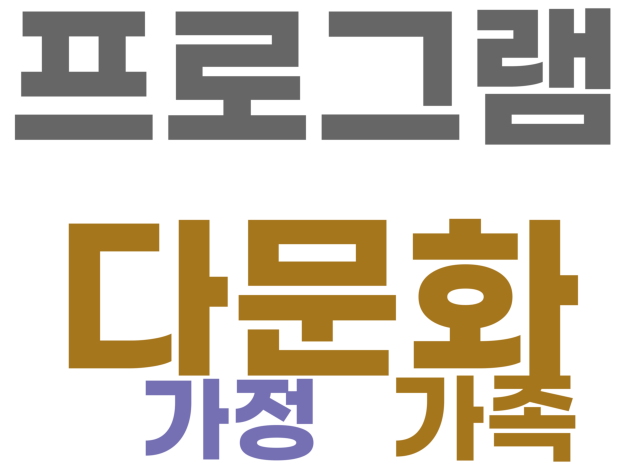

In [37]:
from wordcloud import WordCloud
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=160).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기

In [ ]:
[계층 수요]
# 뉴스 키워드로 '계층' + '뉴스키워드' or ' 광범위한 키워드' --> 트위터 검색 
# 트위터로 계속 단어 전처리 
# 의미있는 단어 나오면 내용 살피고, 의미 있는 단어들이 워드클라우드에 많이 나오면 걔로 프로그램 인사이트 



# 데이터 너무 많으면 밑에 코드

In [ ]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()


list_1 = ll_list[:277374]
list_2 = ll_list[277374:]

import sys

o_ll = []
for i in trange(len(list_1)):
    o_ll.append(okt.nouns(list_1[i]))
    sys.stdout.flush()

o_ll2 = []
for i in trange(len(list_2)):
    o_ll2.append(okt.nouns(list_2[i]))
    sys.stdout.flush()
    
ss = []
sa = []
for i in range(len(o_ll)):
    ss.append(", ".join(o_ll[i]))
    
for i in range(len(o_ll2)):
    sa.append(", ".join(o_ll2[i]))
    
ss_df = pd.DataFrame(ss)
sa_df = pd.DataFrame(sa)

ss_df.to_csv('sample1.csv')
sa_df.to_csv('sample2.csv')

## 특정 키워드를 추출하는 함수 생성
- 수집된 트윗 내용으로부터 특정 키워드가 포함 되어있는지 찾아낸 후 키워드가 포함 되어있는 트윗을 찾아줌.
- 키워드가 포함되어있지 않는 경우 이를 삭제할 것인지 여부를 입력 파라미터에서 결정 가능
- 다수의 키워드를 한번에 입력할 수 있으며 이 경우 키워드 중 하나 이상이 트윗 내용에 존재하는 경우 참으로 간주됨

In [ ]:
# 인자 : 데이터 프레임 / 키워드 리스트 / 내용에 해당하는 컬럼 이름 / 헤시태그만 찾을 것인지 여부 / 키워드에 해당하는 내용이 없는 트윗 삭제 여부
# 리턴되는 결과 : 찾고자 하는 키워드가 있는 데이터가 존재하는 데이터 프레임
    # 조건 1: isOnlyHashtag 가 True 인 경우 키워드 앞에 # 를 붙여서 헤시태그에 해당하는 내용만 찾음 (False 인 경우 순수하게 키워드 존재 여부로 찾아주)
    # 조건 2 : isremove 가 True 인 경우 키워드를 찾지 못한 내용은 삭제한 후 리턴 (False 인경우 flag 만 붙여준 후 리턴)

    def search_keyword(df,keyword,contentCol,isOnlyHashtag,isremove):
    
    rs = df.copy(deep=True)
    target = rs[contentCol]
    keyword_low = []
    # 오로지 헤시태그만 찾고자 하는 경우 키워드 앞에 # 을 붙이는 과정을 진행한다.
    if(isOnlyHashtag == True):
        for k in range(0,len(keyword),1):
            keyword[k] = '#' + keyword[k]
    else:
        keyword = keyword
        
    for k in range(0,len(keyword),1):
        keyword_low.append(keyword[k].lower())
            
    rs['findKeywordFlag'] = False
    rs['findKeyword'] = ''
    
    row = -1
    for i in target: # 콘텐츠의 내용
        i_low = i.lower()
        row = row + 1
        for k in keyword_low: # 키워드 (대소문자는 구분하지 않음)
            
            if(i_low.find(k) >= 0): 
                rs['findKeywordFlag'][row] = True
                key = rs['findKeyword'][row]
                rs['findKeyword'][row] = rs['findKeyword'][row] +  k + '|'
                
    if(isremove == True):
        rs_L1 = rs[rs['findKeywordFlag'] == True]
        rs_L1 = rs_L1.reset_index(drop=True)
    else:
        rs_L1 = rs
        
    return rs_L1;

In [ ]:
# '공공도서관 프로그램'이라는 키워드에는 도서관 홍보자료가 너무 많아서 좋아요가 아예 없는 트윗은 제거했음
tweets_df.sort_values(by = "Like", ascending=False)
tweets_df1 = tweets_df[tweets_df['Like']>0]

In [ ]:
tweets_df1